<a href="https://colab.research.google.com/github/nicksal/thesisNotebooks/blob/master/yoloV7_to_TFlite_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yolo V7 pytorch to Tensorflow Lite conversion

In [1]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1127, done.
remote: Total 1127 (delta 0), reused 0 (delta 0), pack-reused 1127
Receiving objects: 100% (1127/1127), 69.94 MiB | 26.06 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd yolov7

/content/yolov7


In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.9 MB/s eta 0:00:00


In [5]:
!pip --quiet install onnx onnxruntime onnxsim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 101.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 whi

In [19]:
!cp /content/drive/MyDrive/yolov7-thessalonikiMonuments200/weights/best.pt /content/yolov7

In [21]:
!cp /content/drive/MyDrive/yolov7-thessalonikiMonuments200/results.txt /content/yolov7

In [7]:
!python export.py --weights best.pt --grid --end2end --simplify \
        --topk-all 100 --iou-thres 0.65 --conf-thres 0.35 --img-size 640 640 --max-wh 640

Import onnx_graphsurgeon failure: No module named 'onnx_graphsurgeon'
Namespace(batch_size=1, conf_thres=0.35, device='cpu', dynamic=False, dynamic_batch=False, end2end=True, fp16=False, grid=True, img_size=[640, 640], include_nms=False, int8=False, iou_thres=0.65, max_wh=640, simplify=True, topk_all=100, weights='best.pt')
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36573470 parameters, 6194944 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

Starting TorchScript export with torch 1.13.1+cu116...
/content/yolov7/models/yolo.py:150: TracerWarning: Converting a tensor to a Python

In [8]:
!pip install onnx-tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.2 MB/s eta 0:00:00


In [9]:
!onnx-tf convert -i /content/yolov7/best.onnx -o /content/

2023-01-24 21:19:18,353 - onnx-tf - INFO - Start converting onnx pb to tf saved model
INFO:onnx-tf:Start converting onnx pb to tf saved model
2023-01-24 21:19:21.543810: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-01-24 21:19:40,988 - onnx-tf - INFO - Converting completes successfully.
INFO:onnx-tf:Converting completes successfully.


In [10]:
import tensorflow as tf

In [11]:
print(tf.__version__)

2.9.2


In [12]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/')
tflite_model = converter.convert()

In [13]:
with open('/content/yolov7_model.tflite', 'wb') as f:
  f.write(tflite_model)

#Inference using ONNX model

In [14]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/White_Tower_of_Thessaloniki_by_Joy_of_Museums_2.jpg/1024px-White_Tower_of_Thessaloniki_by_Joy_of_Museums_2.jpg

--2023-01-24 21:21:18--  https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/White_Tower_of_Thessaloniki_by_Joy_of_Museums_2.jpg/1024px-White_Tower_of_Thessaloniki_by_Joy_of_Museums_2.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241047 (235K) [image/jpeg]
Saving to: ‘1024px-White_Tower_of_Thessaloniki_by_Joy_of_Museums_2.jpg’

1024px-White_Tower_ 100%[===================>] 235.40K  --.-KB/s    in 0.02s   

2023-01-24 21:21:18 (13.5 MB/s) - ‘1024px-White_Tower_of_Thessaloniki_by_Joy_of_Museums_2.jpg’ saved [241047/241047]



In [16]:
# Inference for ONNX model
import cv2

import cv2
import time
import requests
import random
import numpy as np
import onnxruntime as ort
from PIL import Image
from pathlib import Path
from collections import OrderedDict,namedtuple

cuda = True
w = "/content/yolov7/best.onnx"
img = cv2.imread('/content/yolov7/1024px-White_Tower_of_Thessaloniki_by_Joy_of_Museums_2.jpg')

In [25]:

#Loading the ONNX inference session.
providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if cuda else ['CPUExecutionProvider']
session = ort.InferenceSession(w, providers=providers)


def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

#Name of the classes according to class indices.

with open('labels.txt', 'r') as file:
  data = file.readlines()
names = [line.strip() for line in data]
print(names)

#Creating random colors for bounding box visualization.
colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

image = img.copy()
image, ratio, dwdh = letterbox(image, auto=False)
image = image.transpose((2, 0, 1))
image = np.expand_dims(image, 0)
image = np.ascontiguousarray(image)

im = image.astype(np.float32)
im /= 255
im.shape

outname = [i.name for i in session.get_outputs()]
outname

inname = [i.name for i in session.get_inputs()]
inname

inp = {inname[0]:im}

['Acheiropoietos', 'Aghios Demetrius', 'Byzantine Baths', 'Heptapyrgion', 'Metamorphosis Sotiros', 'Osios David', 'Panayia Chalkeon', 'Profitis Elias', 'Rotunda', 'Saint Aikaterini', 'Saint Apostoles', 'Saint Nikolaos Orphanos', 'Saint Panteleimon', 'Saint Sophia', 'The Walls', 'Trigonion Tower', 'Vlatadon Monastery', 'White Tower']


In [26]:
# ONNX inference
outputs = session.run(outname, inp)[0]
outputs

array([[  0.       , 281.15378  , 149.01749  , 465.5472   , 446.60263  ,
         17.       ,   0.9602429]], dtype=float32)

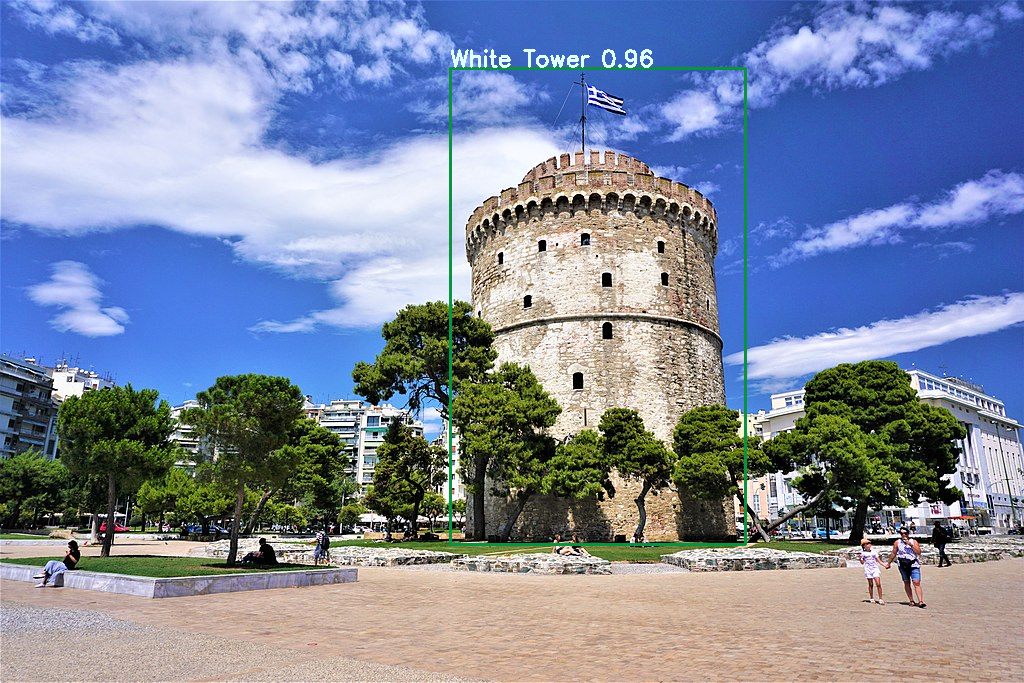

In [27]:
ori_images = [img.copy()]

#Visualizing bounding box prediction.
for i,(batch_id,x0,y0,x1,y1,cls_id,score) in enumerate(outputs):
    image = ori_images[int(batch_id)]
    box = np.array([x0,y0,x1,y1])
    box -= np.array(dwdh*2)
    box /= ratio
    box = box.round().astype(np.int32).tolist()
    cls_id = int(cls_id)
    score = round(float(score),3)
    name = names[cls_id]
    color = colors[name]
    name += ' '+str(score)
    cv2.rectangle(image,box[:2],box[2:],color,2)
    cv2.putText(image,name,(box[0], box[1] - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,[225, 255, 255],thickness=2)  

Image.fromarray(ori_images[0])

#Inference using TFlite

In [28]:
import tensorflow as tf

In [29]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/yolov7_model.tflite")
interpreter.allocate_tensors()



In [30]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
interpreter.set_tensor(input_details[0]['index'], im)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[ 0.0000000e+00  2.8115378e+02  1.4901749e+02  4.6554721e+02
   4.4660263e+02  1.7000000e+01  9.6024299e-01]
 [ 0.0000000e+00 -7.6669846e+00 -6.1999140e+00  1.6794174e+01
   1.8048557e+01  1.7000000e+01  3.8417969e-05]
 [ 0.0000000e+00 -7.6669846e+00 -6.1999140e+00  1.6794174e+01
   1.8048557e+01  1.7000000e+01  3.8417969e-05]
 [ 0.0000000e+00 -7.6669846e+00 -6.1999140e+00  1.6794174e+01
   1.8048557e+01  1.7000000e+01  3.8417969e-05]
 [ 0.0000000e+00 -7.6669846e+00 -6.1999140e+00  1.6794174e+01
   1.8048557e+01  1.7000000e+01  3.8417969e-05]
 [ 0.0000000e+00 -7.6669846e+00 -6.1999140e+00  1.6794174e+01
   1.8048557e+01  1.7000000e+01  3.8417969e-05]
 [ 0.0000000e+00 -7.6669846e+00 -6.1999140e+00  1.6794174e+01
   1.8048557e+01  1.7000000e+01  3.8417969e-05]
 [ 0.0000000e+00 -7.6669846e+00 -6.1999140e+00  1.6794174e+01
   1.8048557e+01  1.7000000e+01  3.8417969e-05]
 [ 0.0000000e+00 -7.6669846e+00 -6.1999140e+00  1.6794174e+01
   1.8048557e+01  1.7000000e+01  3.8417969e-05]
 [ 0.00000

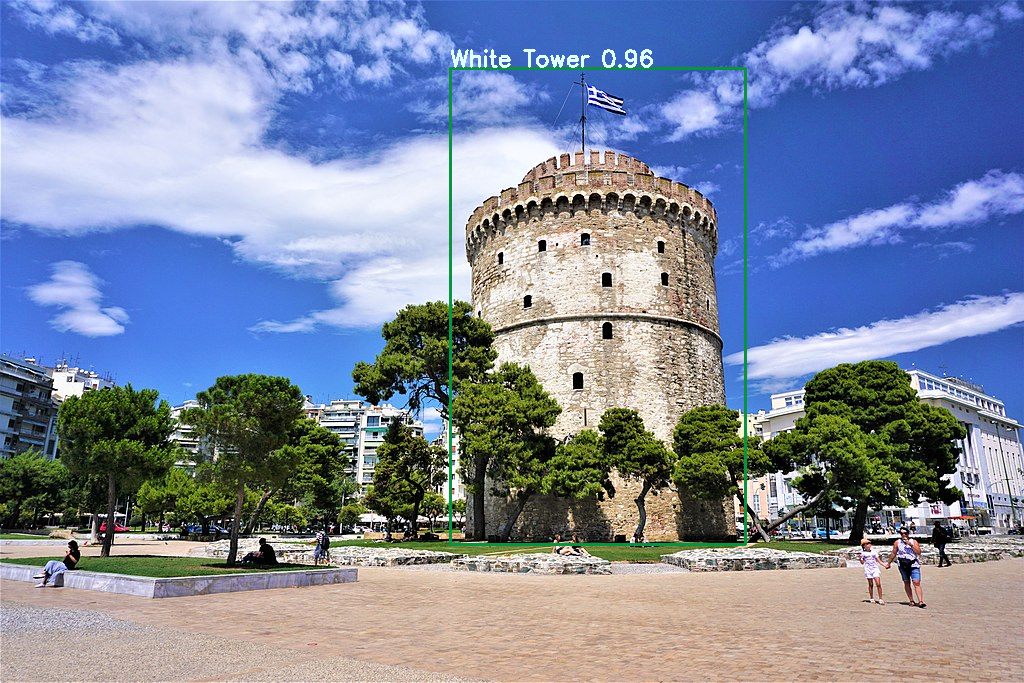

In [31]:
ori_images = [img.copy()]

for i,(batch_id,x0,y0,x1,y1,cls_id,score) in enumerate(output_data):
    image = ori_images[int(batch_id)]
    box = np.array([x0,y0,x1,y1])
    box -= np.array(dwdh*2)
    box /= ratio
    box = box.round().astype(np.int32).tolist()
    cls_id = int(cls_id)
    score = round(float(score),3)
    name = names[cls_id]
    color = colors[name]
    name += ' '+str(score)
    cv2.rectangle(image,box[:2],box[2:],color,2)
    cv2.putText(image,name,(box[0], box[1] - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,[225, 255, 255],thickness=2)  

Image.fromarray(ori_images[0])